# Meta Learner

Conditional Average Treatment Effect (heterogeneous treatment effects)

$$
\tau(x):=\mathbb{E}[Y(1)-Y(0) \mid X=x]
$$

の推定のため、複数の予測モデルを構築する手法

論文： [Künzel, et al. (2019). Metalearners for estimating heterogeneous treatment effects using machine learning.](https://www.pnas.org/doi/full/10.1073/pnas.1804597116)

## T-Learner

回帰問題が解ける任意のアルゴリズムを使い、3つのステップでCATEを推定する。

1. 対照群の観測データをもとに、control response function $\mu_0(x)$ を推定する

$$
\mu_0(x)=\mathbb{E}[Y(0) \mid X=x]
$$

2. 同様に処置群でも treatment response functionを推定する。

$$
\mu_1(x)=\mathbb{E}[Y(1) \mid X=x]
$$



3. 両者の差分をとり、T-learnerの完成

$$
\hat{\tau}_T(x)=\hat{\mu}_1(x)-\hat{\mu}_0(x)
$$

## S-Learner

処置の有無を表す変数$Z$を回帰モデルの特徴量に含める

$$
\mu(x, z):=\mathbb{E}\left[Y^{o b s} \mid X=x, Z=z\right]
$$

そして

$$
\hat{\tau}_S(x)=\hat{\mu}(x, 1)-\hat{\mu}(x, 0)
$$

によってCATEを推定する

## X-Learners

1. response functions $\mu_0(x), \mu_1(x)$ を推定する

$$
\mu_0(x)=\mathbb{E}[Y(0) \mid X=x]
\\
\mu_1(x)=\mathbb{E}[Y(1) \mid X=x]
$$


2. 対照群、処置群それぞれにおける個人の処置効果を実測値と予測値の差分で推定する（ imputed treatment effects）

$$
\tilde{\Delta}_i^{(1)} := Y_i^{(1)} - \hat{\mu}_0(X_i^{(1)})\\
\tilde{\Delta}_i^{(0)} := \hat{\mu}_1(X_i^{(1)}) - Y_i^{(0)}
$$

を使って、

$$
\tau_1(x) = \mathbb{E}\left[\tilde{\Delta}_i^{(1)} \mid X=x \right]\\
\tau_0(x)= \mathbb{E}\left[\tilde{\Delta}_i^{(0)} \mid X=x \right]
$$

と推定する。

もしうまく推定できて$\hat{\mu}_0 = \mu_0, \hat{\mu}_1 = \mu_1$であれば、

$$
\tau(x)
= \mathbb{E}\left[\tilde{\Delta}_i^{(1)} \mid X=x \right]
= \mathbb{E}\left[\tilde{\Delta}_i^{(0)} \mid X=x \right]
$$

（実測値のほうを$\Delta := Y(1) - Y(0)$とすると、$\tau(x) = \mathbb{E}\left[\Delta \mid X=x \right]$のため）

3. 重み関数$g\in [0,1]$を使って$\tau_1(x), \tau_0(x)$を重み付き和にしてCATEを推定する

$$
\hat{\tau}(x)=g(x) \hat{\tau}_0(x)+(1-g(x)) \hat{\tau}_1(x)
$$

$g$はpropensity scoreが経験的によいらしい

## Causal Forestsとのつながり

> An estimator closely related to T–RF and S–RF is Causal Forests, because all three of these estimators can be defined as
>
> $$
  \hat{\tau}(x)=\hat{\mu}(x, w=1)-\hat{\mu}(x, w=0)
  $$
>
> where $\hat{\mu}(x, w)$ is a form of random forest with different constraints on the split on the treatment assignment
> (Appendix of [Künzel, et al. (2019)](https://www.pnas.org/doi/full/10.1073/pnas.1804597116))

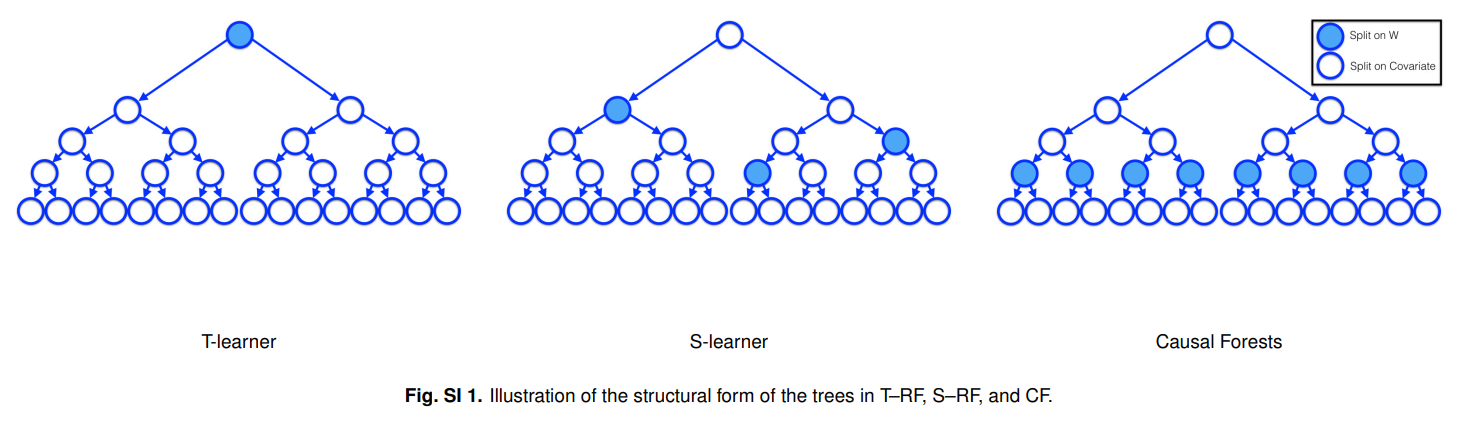

## Doubly Robust Learner (DR-Learner)

処置変数を$D$とする。潜在的結果$Y(D)$を予測するようfitしたモデル$\mu_D(X)$とpropensity model $p_D(X)$ を使って

$$
Y_i(D)
= \mu_D\left(X_i\right)
+ \frac{Y_i-p_D\left(X_i\right)}{p_D\left(X_i\right)} \cdot 1\{T=t\}
$$

をDoubly Robust Learnerと呼ぶ

## DA-Learner

[Lechner, T. (2018). Domain Adaptation Under Causal Assumptions (Doctoral dissertation, Eberhard Karls Universität Tübingen Tübingen).](https://toscalechner.github.io/papers/msc-thesis.pdf)

## R-Leaner

- paper: [Nie, X., & Wager, S. (2017). Quasi-oracle estimation of heterogeneous treatment effects. arXiv e-prints. arXiv preprint arXiv:1712.04912.](https://arxiv.org/abs/1712.04912)
- R package: [xnie/rlearner: Quasi-Oracle Estimation of Heterogeneous Treatment Effects](https://github.com/xnie/rlearner)

## 参考文献

- [Künzel, et al. (2019). Metalearners for estimating heterogeneous treatment effects using machine learning.](https://www.pnas.org/doi/full/10.1073/pnas.1804597116)
- [機械学習で因果推論\~Meta-LearnerとEconML\~](https://zenn.dev/s1ok69oo/articles/1eeebe75842a50)